In [1]:
# import 

#using Pkg
#Pkg.add("Revise")

In [30]:
using Revise
includet("../codebase/mlp.jl")

using Knet, Plots, Statistics, LinearAlgebra, Random, .mlp

In [31]:
λ = 0.001 # regularization
η = 0.1 # learning rate

n=12 # length of input bit array
xdim = n
h1=h2=h3=2*n # hidden layer sizes
ydim = 1 # output is the probability for even parity
nbatch = 100 # number of bit strings presented at each iteration
ntest = div(2^n,8) # keep 1/8-th as test set
niter = 10^5 # number of training iterations

100000

In [32]:
# NN parameters
w1 = Param(randn(h1,xdim))
b1 = Param(randn(h1))
w2 = Param(randn(h2,h1))
b2 = Param(randn(h2))
w3 = Param(randn(h3,h2))
b3 = Param(randn(h3))
w4 = Param(randn(1,h3))
b4 = Param(randn(1))
w = (w1,w2,w3,w4)
b = (b1,b2,b3,b4)


(P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(24)), P(Array{Float64,1}(1)))

In [33]:
xtrn, ytrn, xtst, ytst = mlp.gen_and_split_data(n, ntest)

([0 0 … 1 1; 0 0 … 1 1; … ; 0 1 … 0 1; 1 0 … 1 1], [1 1 … 1 0], [0 0 … 1 1; 0 1 … 1 1; … ; 1 1 … 0 1; 0 0 … 0 0], [1 1 … 1 0])

In [34]:
w, b, losstrn, losstst = mlp.backprop(w, b, niter, n, ntest, nbatch, (xdim, h1, h2, h3, ydim); λ= 0.001);

┣████████████████████┫ [100.00%, 100000/100000, 01:34/01:34, 1059.64i/s] 


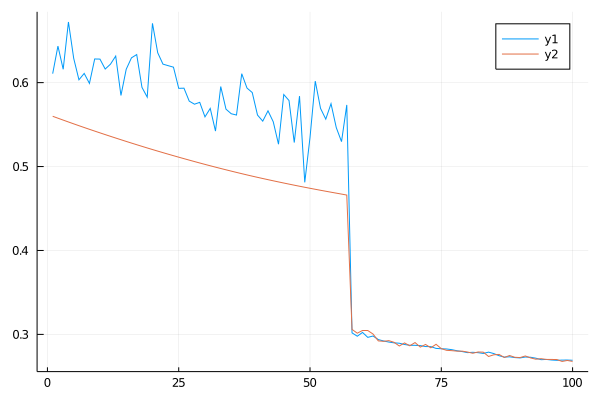

In [22]:
plot(losstrn)
plot!(losstst) 

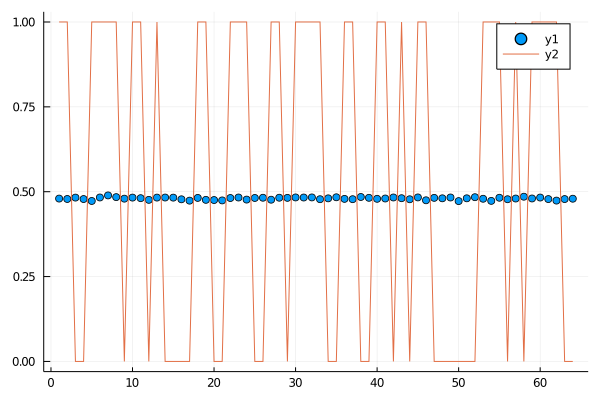

In [23]:
np=min(ntest,64)
scatter(pred(w,b,xtst)[1:np]
#    ,xlim=(0,np)
)
plot!(ytst[1:np])

In [24]:
# accuracy
function acc(x,y)
    cnt = 0
    tot = length(x[1,:])
    for i=1:tot-1
        chk = (pred(w,b,x[:,i])[1] - y[i][1])^2
        if (chk < 0.5)
            cnt += 1
        end
    end
    return 1.0*cnt/tot
end

acc (generic function with 1 method)

In [25]:
acc(xtrn,ytrn),acc(xtst,ytst)

(0.9997209042701647, 0.998046875)

In [26]:
# distribution of weights
histogram(reshape(w1,:,1)[:,1],normalize=:pdf)

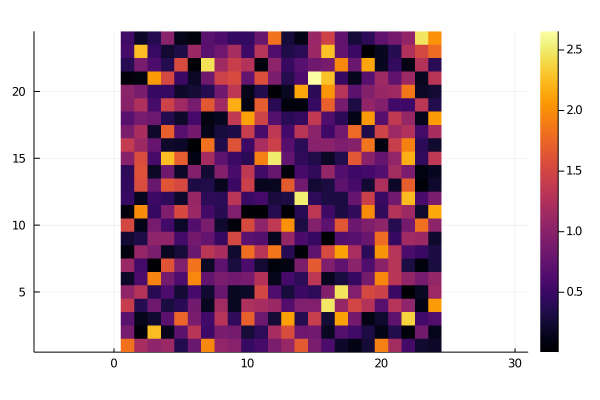

In [12]:
heatmap(abs.(value(w2)),aspect_ratio=1)

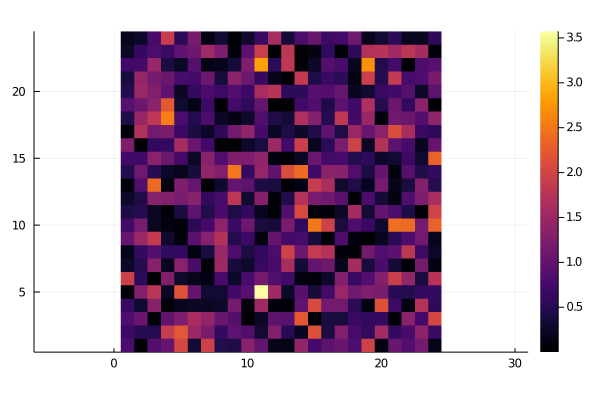

In [13]:
heatmap(abs.(value(w3)),aspect_ratio=1)

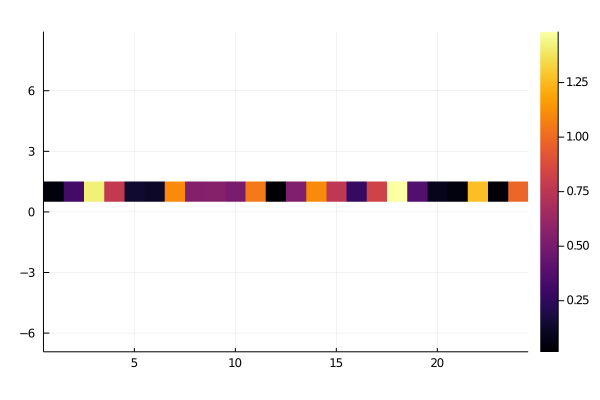

In [14]:
heatmap(abs.(value(w4)),aspect_ratio=1)

In [28]:
sumtrn = 0.0; sumtst = 0.0

for i=1:100
    xtrn, ytrn, xtst, ytst = mlp.gen_and_split_data(n, ntest)
    sumtrn += acc(xtrn,ytrn); sumtst += acc(xtst,ytst)
end

(sumtrn/100,sumtst/100) # (overfitted but works)

(0.9997209042701636, 0.998046875)